# Importing Necessary Modules

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Importing Data

In [5]:
df = pd.read_csv(r'DailyDelhiClimateTrain.csv')
print(df.head())

         date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000


# Descriptive Statistics of the Data 

In [6]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


### Checking null fields in the data

In [8]:
df.count().isnull()

date            False
meantemp        False
humidity        False
wind_speed      False
meanpressure    False
dtype: bool

### Information about the type of data in the columns

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


# Plotting graph between Mean Temperature and Date 

In [13]:
figure1 = px.line(df, x = 'date', y = 'meantemp', title = 'Mean Temperature over years')
figure1.show()

###### Question: What is plotly.express?

# Humidity over the years 

In [14]:
figure2 = px.line(df,x = 'date', y = 'humidity', title = 'Humidity Over the years')
figure2.show()

# Windspeed Over the years 

In [15]:
figure3 = px.line(df,x = 'date',y = 'wind_speed', title = 'Windspeed Over the years')
figure3.show()

# Relation Between Mean Temperature and Humidity 

In [21]:
figure4 = px.scatter(data_frame = df, x = 'humidity', y = 'meantemp', size = 'meantemp', trendline = 'ols', title = 'Relation between Humidity and Mean Temperature')
figure4.show()

### Humidity and mean temperature have negative correlation, i.e., as humidity increases temperature falls.

# Data Pre-proccessing

### Converting data type of date into datetype

#### Also, creating two more columns as year and month

In [26]:
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

df.sample(5)

,date,meantemp,humidity,wind_speed,meanpressure,year,month
452,2014-03-29,25.875000,55.625000,8.350000,1011.250000,2014,3
217,2013-08-06,27.166667,90.666667,4.016667,1002.166667,2013,8
656,2014-10-19,23.750000,57.750000,4.162500,1012.625000,2014,10
396,2014-02-01,14.000000,79.375000,2.550000,1019.750000,2014,2
797,2015-03-09,18.125000,54.250000,12.262500,1021.000000,2015,3


# Temperature change in Delhi over the years

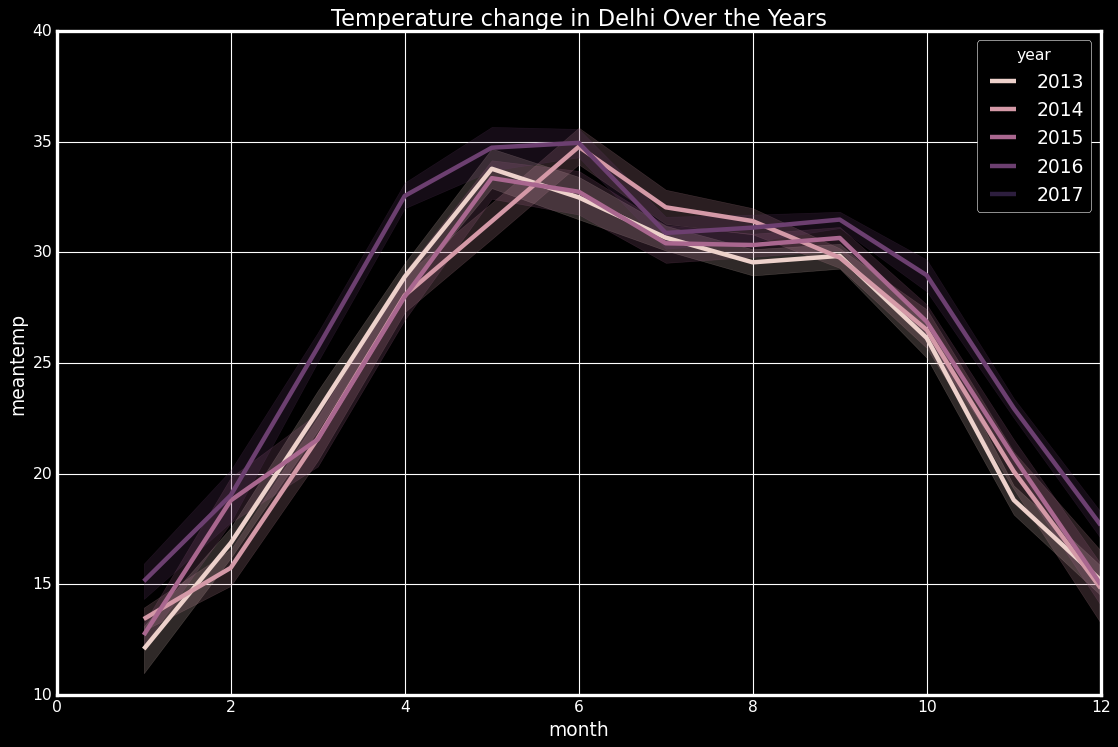

In [32]:
plt.style.use('dark_background')
plt.figure(figsize=(15,10))
plt.title('Temperature change in Delhi Over the Years')
sns.lineplot(data = df,x = 'month',y= 'meantemp',hue = 'year')
plt.show()

##### Question: What is plt.style? What are different type of styles?

# Importing Test Data 

In [53]:
new_data = pd.read_csv('DailyDelhiClimateTest.csv')
new_data = new_data.rename(columns = {'date':'ds','meantemp':'y'})

# Importing Prophet module for forecasting 

######  prophet is used for forecasting

###### NOTE: Learn more about prophet

In [54]:
from prophet import Prophet

from prophet.plot import plot_plotly, plot_components_plotly

# Fitting the Model 

In [55]:
model = Prophet()
model.fit(new_data)

forecasts = model.make_future_dataframe(periods = 365)
predictions = model.predict(forecasts)

plot_plotly(model, predictions)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\ASUS\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ASUS\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ASUS\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

